In [11]:
import sys

In [12]:
import nbformat

In [14]:
from nbformat.v4 import new_notebook, new_code_cell

In [15]:
nb = new_notebook()

In [22]:
with open(sys.argv[1]) as f:
    code = f.read("/Users/asharifi/Desktop/Nba_pycharm.py")

FileNotFoundError: [Errno 2] No such file or directory: '-f'

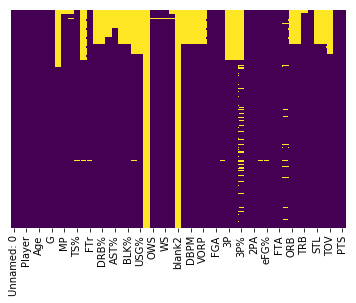

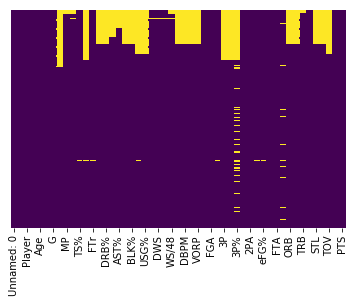

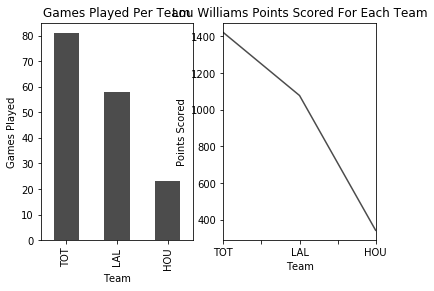

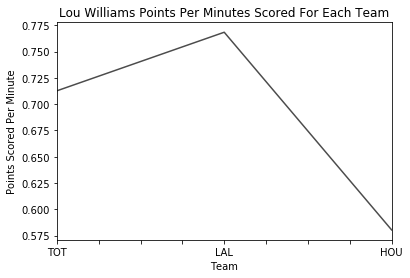

In [29]:
# %load Nba_pycharm.py
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv("/Users/asharifi/Downloads/nba-players-stats/Seasons_Stats.csv")
#data discovery
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.show()

#data prep
data = data.drop(labels = ["blank2", "blanl"], axis=1)
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')
plt.show()

#there seems to a lot of data missing from the first 3rd of the data
#but instead of removing all of the rows, let's see where a 0 or other numerical imputation value is appropriate
#to do this let's investigate the columns where we see many null, and define what sorts of values are valid

#based on the output, we see that games started ("GS") has a significant number of missing values.  Let's check to see
#what sorts of values we can find here:

#print(data[['Player', 'GS']])
#ONE PROBLEM:we notice that there is a player called Metta World, formerly known as Ron Artest. So we should expect
#there to be two different names for the same player.  How can we ensure these two different names refer
#to the same person?  We can either change all instances of Ron Artest to Metta World or vice-versa.

#ANOTHER PROBLEM: this tells us for each given year how many games a player started, but there seems to be duplicates
#well this is because this is the number of games started per year
#but let's confirm this

#print(data[['Year', 'Player', 'GS']])

#no we are wrong, it seems for 2017 there are multiple entries for Deron Williams.
#I wonder how they are distinguished?  Maybe they were traded, so they have different starts based
#on the team they were on?

#print(data[['Year', 'Player', 'GS', 'Tm']])

#yes, upon further investigation it seems that in 2017, Lou William was traded multiple times to different
#teams. Thus, the data shows that he started once for two different team in 2017: the Lakers and the Raptors.

#huh, I wonder if all that moving affected his game?
#lets look at Lou William in 2017 and see how he did.

data_lou_williams_2017 = data.loc[(data['Player'] == 'Lou Williams') & (data['Year'] == 2017)]

#huh, we are getting a lot of rows, so its hard to see everything.

#let's see how many points he scored for each team
fig,axes = plt.subplots(1,2)
info = pd.Series(data_lou_williams_2017['PTS'].values, index = list(data_lou_williams_2017['Tm']))
info1 = pd.Series(data_lou_williams_2017['G'].values, index = list(data_lou_williams_2017['Tm']))
info1.plot.bar(ax = axes[0], color='k', alpha = 0.7)
info.plot(ax = axes[1], color='k', alpha=0.7)
axes[0].set_title("Games Played Per Team")
axes[0].set_xlabel('Team')
axes[0].set_ylabel('Games Played')
plt.title("Lou Williams Points Scored For Each Team")
plt.xlabel("Team")
plt.ylabel("Points Scored")
plt.show()

#okay, but that doesn't really help us since, he played a different amount of games per team.

info = pd.Series(data_lou_williams_2017['PTS'].values/data_lou_williams_2017['MP'].values, index = list(data_lou_williams_2017['Tm']))
#info.plot.bar(ax = axes[0], color='k', alpha = 0.7)
info.plot(color='k', alpha=0.7)
plt.title("Lou Williams Points Per Minutes Scored For Each Team")
plt.xlabel("Team")
plt.ylabel("Points Scored Per Minute")
plt.show()

#this tells us how many points he scored per game, but maybe his role in the team has changed and he might be coached
#to focus more on rebounds or steal or some other useful factor.

#line graph
# x axis are the teams he played on
# y's are ORB, DRB, TRB, AST, STL, and BLK% in different colors

df = pd.DataFrame(index = data_lou_williams_2017['Tm'].values, columns=data_lou_williams_2017['ORB%'].values)
plt.show()
